In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1.
Construa uma função (codificador) que para cada bloco de 8×8 da imagem original efetue a DCT bidimensional
e construa outra função (descodificador) que faça a DCT inversa. Ver funções: cv2.dct() e cv2.idct())
Visualize a imagem depois da DCT e verifique que a DCT inversa resulta na imagem original.

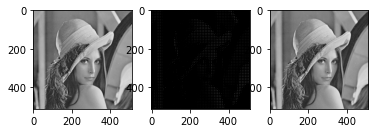

In [3]:
def CodificadorDCT(imagem):
    conversao = cv2.cvtColor(imagem, cv2.COLOR_BGR2YUV)
    
    rows = int(conversao.shape[0] / 8)
    cols = int(conversao.shape[1] / 8)
    luminancia = conversao[:,:,0]

    dct = np.zeros((conversao.shape[0], conversao.shape[1]))

    for pixeisRow in range(rows):
        for pixeisCol in range(cols):
            bloco8X8 = luminancia[pixeisRow * 8 : pixeisRow * 8 + 8, pixeisCol * 8 : pixeisCol * 8 + 8]
            bloco8X8 = bloco8X8.astype(np.float32)
            bloco8X8DCT = cv2.dct(bloco8X8-128)
            dct[pixeisRow * 8 : pixeisRow * 8 + 8, pixeisCol * 8 : pixeisCol * 8 + 8] = bloco8X8DCT

    return dct
            
def DescodificadorIDCT(imagem):
    rows = int(imagem.shape[0] / 8) 
    cols = int(imagem.shape[1] / 8) 
    
    idct = np.zeros((imagem.shape[0], imagem.shape[1]))
    
    for pixeisRow in range(rows):
        for pixeisCol in range(cols):
            bloco8X8 = cv2.idct(imagem[pixeisRow * 8 : pixeisRow * 8 + 8, pixeisCol * 8 : pixeisCol * 8 + 8])
            bloco8X8 = bloco8X8.astype(np.uint8)
            idct[pixeisRow * 8 : pixeisRow * 8 + 8, pixeisCol * 8 : pixeisCol * 8 + 8] = bloco8X8+128
            
    return idct
    
            
lena = cv2.imread( "lena.tif")
dct = CodificadorDCT(lena)
idct = DescodificadorIDCT(dct)

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY), cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 3, 2)
plt.imshow(dct, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(idct, cmap='gray', vmin=0, vmax=255)

## 2.
Construa uma função (codificador) que para cada bloco de 8 × 8 de coeficientes da transformação efectuada faça
a divisão pela matriz de quantificação (tabela K1 no anexo da norma) multiplicada por um factor de qualidade q
(ver função quality_factor do ficheiro Tabelas_jpeg.ipynb). Veja a imagem com o conjunto dos blocos após
a quantificação. Construa uma função (descodificador) que realize a operação inversa da quantificação.<br>
Junte estas funções às já realizadas e verifique para diferentes fatores de qualidade qual a SNR e veja a imagem
descodificada.

In [4]:
# tabela K1 - Luminance quantize Matrix  
Q = np.zeros((8, 8))
Q[0] = [ 16,  11,  10,  16,  24,  40,  51,  61]
Q[1] = [ 12,  12,  14,  19,  26,  58,  60,  55]
Q[2] = [ 14,  13,  16,  24,  40,  57,  69,  56]
Q[3] = [ 14,  17,  22,  29,  51,  87,  80,  62]
Q[4] = [ 18,  22,  37,  56,  68, 109, 103,  77]
Q[5] = [ 24,  35,  55,  64,  81, 104, 113,  92]
Q[6] = [ 49,  64,  78,  87, 103, 121, 120, 101]
Q[7] = [ 72,  92,  95,  98, 112, 100, 103,  99]

def quality_factor(q):
    if(q <= 50):
        factor = 50.0 / q
    else:
        factor = 2.0 - (q * 2.0)/100.0
    return factor 

array([[81.,  2.,  2., ..., -0., -1., -0.],
       [ 3., -0.,  0., ..., -0., -0., -0.],
       [-2., -0., -0., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  0., -0., -0.],
       [-0., -0., -0., ..., -0.,  0.,  0.],
       [ 0., -0., -0., ..., -0.,  0.,  0.]])

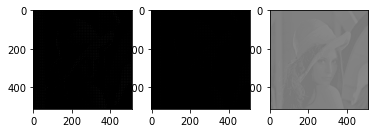

In [5]:
def CodificadorQuantificador(imagem):
    rows = int(imagem.shape[0] / 8)
    cols = int(imagem.shape[0] / 8)
    
    imagemQuantificada = np.zeros((imagem.shape[0], imagem.shape[1]))
    imagem = imagem.astype(np.float32)
    
    for pixeisRow in range(rows):
        for pixeisCol in range(cols):
            bloco8X8 = imagem[pixeisRow * 8 : pixeisRow * 8 + 8, pixeisCol * 8 : pixeisCol * 8 + 8]
            quantizacao = np.round(bloco8X8 / (quality_factor(90) * Q))
            imagemQuantificada[pixeisRow * 8 : pixeisRow * 8 + 8, pixeisCol * 8 : pixeisCol * 8 + 8] = quantizacao
    
    #imagemQuantificada.astype(np.uint8)
    
    return imagemQuantificada

def DescodificadorQuantificador(imagem):
    rows = int(imagem.shape[0] / 8)
    cols = int(imagem.shape[0] / 8)
    
    imagemDesquantificada = np.zeros((imagem.shape[0], imagem.shape[1]))
    imagem = imagem.astype(np.float32)
    
    for pixeisRow in range(rows):
        for pixeisCol in range(cols):
            bloco8X8 = imagem[pixeisRow * 8 : pixeisRow * 8 + 8, pixeisCol * 8 : pixeisCol * 8 + 8]
            desquantizacao = quality_factor(99) * Q * bloco8X8
            imagemDesquantificada[pixeisRow * 8 : pixeisRow * 8 + 8, pixeisCol * 8 : pixeisCol * 8 + 8] = desquantizacao
    
    imagemDesquantificada.astype(np.uint8)
    
    return imagemDesquantificada

quantizada = CodificadorQuantificador(dct)
desquantizada = DescodificadorQuantificador(quantizada)
idct2 = DescodificadorIDCT(desquantizada)

plt.subplot(1, 3, 1)
plt.imshow(quantizada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 2)
plt.imshow(desquantizada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.imshow(idct2, cmap='gray', vmin=0, vmax=255)

quantizada

## 3.
Construa uma função (codificador) que faça a codificação diferencial dos coeficientes DC após a quantificação.
Construa a função inversa para o descodificador.

In [6]:
# ordem zig-zag 
zigzag = np.zeros((8, 8))
zigzag[0] = [ 0,  1,  5,  6, 14, 15, 27, 28]
zigzag[1] = [ 2,  4,  7, 13, 16, 26, 29, 42]
zigzag[2] = [ 3,  8, 12, 17, 25, 30, 41, 43]
zigzag[3] = [ 9, 11, 18, 24, 31, 40, 44, 53]
zigzag[4] = [10, 19, 23, 32, 39, 45, 52, 54]
zigzag[5] = [20, 22, 33, 38, 46, 51, 55, 60]
zigzag[6] = [21, 34, 37, 47, 50, 56, 59, 61]
zigzag[7] = [35, 36, 48, 49, 57, 58, 62, 63]
zigzag=zigzag.astype('int16')
ind_zz = np.argsort(zigzag.reshape((64),order='F').astype('int16'))

In [7]:
def CodificadorDC_AC(imagemRecebida):
    
    #Sem esta linha, a imagemRecebida é alterada
    imagem = imagemRecebida.copy()
    
    rows = int(imagem.shape[0] / 8)
    cols = int(imagem.shape[0] / 8)
    
    dcAnterior = 0
    componenteDC = np.zeros(rows * cols, dtype="float")
    
    componenteAC_Auxiliar = np.zeros((8, 8))
    componenteAC = np.zeros(rows * cols * 8 * 8 - 1)
    
    indexDC_AC = 0
    
    for pixeisRow in range(rows):
        for pixeisCol in range(cols):
            #Componente DC
            if indexDC_AC == 0:
                componenteDC[indexDC_AC] = imagem[pixeisRow * 8, pixeisCol * 8]
            else:
                componenteDC[indexDC_AC] = imagem[pixeisRow * 8, pixeisCol * 8] - dcAnterior
    
            dcAnterior = imagem[pixeisRow * 8, pixeisCol * 8]
            
            #Componente AC
            componenteAC_Auxiliar = imagem[pixeisRow * 8 : pixeisRow * 8 + 8, pixeisCol * 8 : pixeisCol * 8 + 8]
            componenteAC_Auxiliar[0, 0] = 0
            componenteAC_Auxiliar = componenteAC_Auxiliar.reshape((64), order='F')[ind_zz]
            componenteAC[8 * 8 * indexDC_AC : 8 * 8 * indexDC_AC + (8 * 8 - 1)] = componenteAC_Auxiliar[1 :]
            
            indexDC_AC = indexDC_AC + 1
    
    return componenteDC, componenteAC

def DescodificadorDC_AC(componenteDC, componenteAC):
    
    tamanhoDimensao = int(np.sqrt(len(componenteDC) * 8 * 8))
    imagem = np.zeros((tamanhoDimensao, tamanhoDimensao))
    
    bloco8X8 = np.zeros(8 * 8)
    
    dcAnterior = 0
    
    indexDC_AC = 0
    
    for pixeisRow in range(int(tamanhoDimensao / 8)):
        for pixeisCol in range(int(tamanhoDimensao / 8)):
            
            #Componente AC
            bloco8X8[1 : 8 * 8] = componenteAC[8 * 8 * indexDC_AC : 8 * 8 * indexDC_AC + (8 * 8 - 1)]
            
            #Componente DC
            dcAnterior = dcAnterior + componenteDC[indexDC_AC]
            bloco8X8[0] = dcAnterior
            
            
            imagem[pixeisRow * 8 : pixeisRow * 8 + 8, pixeisCol * 8 : pixeisCol * 8 + 8] = bloco8X8[zigzag.reshape((64))].reshape(8,8)
        
            indexDC_AC = indexDC_AC + 1
    
    return imagem

print(quantizada)
print()
componenteDC, componenteAC = CodificadorDC_AC(quantizada)
print(componenteDC)
print(componenteAC)
print()
quantizadaAposDescodificacaoDC_AC = DescodificadorDC_AC(componenteDC, componenteAC)
print(quantizadaAposDescodificacaoDC_AC)

[[81.  2.  2. ... -0. -1. -0.]
 [ 3. -0.  0. ... -0. -0. -0.]
 [-2. -0. -0. ...  0.  0.  0.]
 ...
 [ 1.  0.  0. ...  0. -0. -0.]
 [-0. -0. -0. ... -0.  0.  0.]
 [ 0. -0. -0. ... -0.  0.  0.]]

[ 81.  -4.  -7. ... -96.   6.  73.]
[ 2.  3. -2. ...  0.  0.  0.]

[[81.  2.  2. ... -0. -1. -0.]
 [ 3. -0.  0. ... -0. -0. -0.]
 [-2. -0. -0. ...  0.  0.  0.]
 ...
 [ 1.  0.  0. ...  0. -0. -0.]
 [-0. -0. -0. ... -0.  0.  0.]
 [ 0. -0. -0. ... -0.  0.  0.]]


## 4.
Construa uma função (codificador) que crie um array com a indexação em zig-zag dos coeficientes AC após a
quantificação e crie um array com os pares (zero run length, nonzero value).<br>
Construa a função inversa para o descodificador.

In [8]:
# Tabela K3 
# Table for luminance DC coefficient differences
K3 = dict()
K3[0] = "00"
K3[1] = "010"
K3[2] = "011"
K3[3] = "100"
K3[4] = "101"
K3[5] = "110"
K3[6] = "1110"
K3[7] = "11110"
K3[8] = "111110"
K3[9] = "1111110"
K3[10] = "11111110"
K3[11] = "111111110"

# Tabela K5 
# Table for luminance AC coefficients
K5 = dict()
K5[(0, 0)] = "1010"
K5[(0, 1)] = "00"
K5[(0, 2)] = "01"
K5[(0, 3)] = "100"
K5[(0, 4)] = "1011"
K5[(0, 5)] = "11010"
K5[(0, 6)] = "1111000"
K5[(0, 7)] = "11111000"
K5[(0, 8)] = "1111110110"
K5[(0, 9)] = "1111111110000010"
K5[(0,10)] = "1111111110000011"

K5[(1, 1)] = "1100"
K5[(1, 2)] = "11011"
K5[(1, 3)] = "1111001"
K5[(1, 4)] = "111110110"
K5[(1, 5)] = "11111110110"
K5[(1, 6)] = "1111111110000100"
K5[(1, 7)] = "1111111110000101"
K5[(1, 8)] = "1111111110000110"
K5[(1, 9)] = "1111111110000111"
K5[(1,10)] = "1111111110001000"

K5[(2, 1)] = "11100"
K5[(2, 2)] = "11111001"
K5[(2, 3)] = "1111110111"
K5[(2, 4)] = "111111110100"
K5[(2, 5)] = "1111111110001001"
K5[(2, 6)] = "1111111110001010"
K5[(2, 7)] = "1111111110001011"
K5[(2, 8)] = "1111111110001100"
K5[(2, 9)] = "1111111110001101"
K5[(2,10)] = "1111111110001110"

K5[(3, 1)] = "111010"
K5[(3, 2)] = "111110111"
K5[(3, 3)] = "111111110101"
K5[(3, 4)] = "1111111110001111"
K5[(3, 5)] = "1111111110010000"
K5[(3, 6)] = "1111111110010001"
K5[(3, 7)] = "1111111110010010"
K5[(3, 8)] = "1111111110010011"
K5[(3, 9)] = "1111111110010100"
K5[(3,10)] = "1111111110010101"

K5[(4, 1)] = "111011"
K5[(4, 2)] = "1111111000"
K5[(4, 3)] = "1111111110010110"
K5[(4, 4)] = "1111111110010111"
K5[(4, 5)] = "1111111110011000"
K5[(4, 6)] = "1111111110011001"
K5[(4, 7)] = "1111111110011010"
K5[(4, 8)] = "1111111110011011"
K5[(4, 9)] = "1111111110011100"
K5[(4,10)] = "1111111110011101"

K5[(5, 1)] = "1111010"
K5[(5, 2)] = "11111110111"
K5[(5, 3)] = "1111111110011110"
K5[(5, 4)] = "1111111110011111"
K5[(5, 5)] = "1111111110100000"
K5[(5, 6)] = "1111111110100001"
K5[(5, 7)] = "1111111110100010"
K5[(5, 8)] = "1111111110100011"
K5[(5, 9)] = "1111111110100100"
K5[(5,10)] = "1111111110100101"

K5[(6, 1)] = "1111011"
K5[(6, 2)] = "111111110110"
K5[(6, 3)] = "1111111110100110"
K5[(6, 4)] = "1111111110100111"
K5[(6, 5)] = "1111111110101000"
K5[(6, 6)] = "1111111110101001"
K5[(6, 7)] = "1111111110101010"
K5[(6, 8)] = "1111111110101011"
K5[(6, 9)] = "1111111110101100"
K5[(6,10)] = "1111111110101101"

K5[(7, 1)] = "11111010"
K5[(7, 2)] = "111111110111"
K5[(7, 3)] = "1111111110101110"
K5[(7, 4)] = "1111111110101111"
K5[(7, 5)] = "1111111110110000"
K5[(7, 6)] = "1111111110110001"
K5[(7, 7)] = "1111111110110010"
K5[(7, 8)] = "1111111110110011"
K5[(7, 9)] = "1111111110110100"
K5[(7,10)] = "1111111110110101"

K5[(8, 1)] = "111111000"
K5[(8, 2)] = "111111111000000"
K5[(8, 3)] = "1111111110110110"
K5[(8, 4)] = "1111111110110111"
K5[(8, 5)] = "1111111110111000"
K5[(8, 6)] = "1111111110111001"
K5[(8, 7)] = "1111111110111010"
K5[(8, 8)] = "1111111110111011"
K5[(8, 9)] = "1111111110111100"
K5[(8,10)] = "1111111110111101"

K5[(9, 1)] = "111111001"
K5[(9, 2)] = "1111111110111110"
K5[(9, 3)] = "1111111110111111"
K5[(9, 4)] = "1111111111000000"
K5[(9, 5)] = "1111111111000001"
K5[(9, 6)] = "1111111111000010"
K5[(9, 7)] = "1111111111000011"
K5[(9, 8)] = "1111111111000100"
K5[(9, 9)] = "1111111111000101"
K5[(9,10)] = "1111111111000110"

K5[(10, 1)] = "111111010"
K5[(10, 2)] = "1111111111000111"
K5[(10, 3)] = "1111111111001000"
K5[(10, 4)] = "1111111111001001"
K5[(10, 5)] = "1111111111001010"
K5[(10, 6)] = "1111111111001011"
K5[(10, 7)] = "1111111111001100"
K5[(10, 8)] = "1111111111001101"
K5[(10, 9)] = "1111111111001110"
K5[(10,10)] = "1111111111001111"

K5[(11, 1)] = "1111111001"
K5[(11, 2)] = "1111111111010000"
K5[(11, 3)] = "1111111111010001"
K5[(11, 4)] = "1111111111010010"
K5[(11, 5)] = "1111111111010011"
K5[(11, 6)] = "1111111111010100"
K5[(11, 7)] = "1111111111010101"
K5[(11, 8)] = "1111111111010110"
K5[(11, 9)] = "1111111111010111"
K5[(11,10)] = "1111111111011000"

K5[(12, 1)] = "1111111010"
K5[(12, 2)] = "1111111111011001"
K5[(12, 3)] = "1111111111011010"
K5[(12, 4)] = "1111111111011011"
K5[(12, 5)] = "1111111111011100"
K5[(12, 6)] = "1111111111011101"
K5[(12, 7)] = "1111111111011110"
K5[(12, 8)] = "1111111111011111"
K5[(12, 9)] = "1111111111100000"
K5[(12,10)] = "1111111111100001"

K5[(13, 1)] = "11111111000"
K5[(13, 2)] = "1111111111100010"
K5[(13, 3)] = "1111111111100011"
K5[(13, 4)] = "1111111111100100"
K5[(13, 5)] = "1111111111100101"
K5[(13, 6)] = "1111111111100110"
K5[(13, 7)] = "1111111111100111"
K5[(13, 8)] = "1111111111101000"
K5[(13, 9)] = "1111111111101001"
K5[(13,10)] = "1111111111101010"

K5[(14, 1)] = "1111111111101011"
K5[(14, 2)] = "1111111111101100"
K5[(14, 3)] = "1111111111101101"
K5[(14, 4)] = "1111111111101110"
K5[(14, 5)] = "1111111111101111"
K5[(14, 6)] = "1111111111110000"
K5[(14, 7)] = "1111111111110001"
K5[(14, 8)] = "1111111111110010"
K5[(14, 9)] = "1111111111110011"
K5[(14,10)] = "1111111111110100"

K5[(15, 0)] = "11111111001"
K5[(15, 1)] = "1111111111110101"
K5[(15, 2)] = "1111111111110110"
K5[(15, 3)] = "1111111111110111"
K5[(15, 4)] = "1111111111111000"
K5[(15, 5)] = "1111111111111001"
K5[(15, 6)] = "1111111111111010"
K5[(15, 7)] = "1111111111111011"
K5[(15, 8)] = "1111111111111100"
K5[(15, 9)] = "1111111111111101"
K5[(15,10)] = "1111111111111110"

In [11]:
#DC -> (Size, Amplitude)
#AC -> (Zero Run Length, Non-Zero Value) -> (Zero Run Length, Size, Amplitude)

def CompressorDC_AC(componentesDC, componenteAC):
    mensagemCodificada = "";
    componenteAC = 0
    componenteAC_ZeroRunLength = 0
    
    for componenteDC in componentesDC:
        
        valorBinario = bin(int(componenteDC))
        
        if(componenteDC >= 0):
            amplitudeDC = valorBinario[2::]
        else:
            amplitudeDC = valorBinario[3::]
        sizeDC = len(amplitudeDC)
        
        print("Valor DC: {0}, Valor Binário: {1}".format(int(componenteDC), valorBinario))
        
        mensagemCodificada = mensagemCodificada + K3[sizeDC] + amplitudeDC
    
        for componenteAC in range(63):
            if componenteAC is 0:
                componenteAC_ZeroRunLength = componenteAC_ZeroRunLength + 1
                
                if componenteAC_ZeroRunLength is 15:
                    mensagemCodificada = mensagemCodificada + K5[(15, 0)]
                    componenteAC_ZeroRunLength = 0
            else:
                mensagemCodificada = mensagemCodificada + K5[(componenteAC_ZeroRunLength, componenteAC)]
                componenteAC_ZeroRunLength = 0
                
        componenteAC_ZeroRunLength = 0
        componenteAC = componenteAC + 63
        
    return mensagemCodificada

def DescompressorDC_AC():
    
    return 0

a = CompressorDC_AC(componenteDC, componenteAC)
a

Valor DC: 81, Valor Binário: 0b1010001


<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:27: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:27: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-11-ac23f950d437>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if componenteAC is 0:
<ipython-input-11-ac23f950d437>:27: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if componenteAC_ZeroRunLength is 15:


KeyError: (0, 11)

## 5.
Junte estas funções às já realizadas e veja a imagem descodificada.

## 6.
Construa uma função que dados os arrays das alíneas anteriores use as tabelas do código de Huffman (tabela K3
e K5) e grave num ficheiro a sequência de bits correspondente. (não é necessário usar o formato JFIF)

## 7.
Construa uma função que leia o ficheiro gravado e retorne os arrays com os coeficientes AC e DC.

## 8.
Junte estas funções às já realizadas e veja a imagem descodificada.<br>
Para diferentes factores de qualidade meça a relação sinal-ruído e a taxa de compressão obtida. Represente um gráfico onde se apresente a taxa de compressão em função do SNR.

## 9.
No mesmo gráfico compare o seu compressor de imagem com outros existentes para várias qualidades.

## 10.
O Jupyter Notebook o deve conter uma descrição breve das funções realizadas e uma tabela com todos os
resultados da SNR, taxa de compressão, tempo de compressão e descompressão.